In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

# Logistic Regression: StatsModels and Details of Regression

We can do some more logitic regression to make classification predictions, there's some things that we do to try to drive accuracy up, and some other work we can do to interpret the accuracy better. 

In [2]:
#Read diabetes data
df = pd.read_csv("data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Baseline Accuracy

Before we get going, we'll touch on a simple concept - the baseline accuracy. For example, in post WW2 Germany the ratio of males to females was approximately .6 (3:5) for people in their 20s - or approximately 5/8 or 62.5% of people were females. 

If we were to build some model to predict if a twenty-soemthing was a male or female, this should be the worst we can do. A 'default' model of always guessing female will be 62.5% accurate, so if we can't beat that, we suck and are useless. 

In [3]:
#baseline for diabetes
1 - df["Outcome"].mean()

0.6510416666666667

So... a model guessing NO at all times would be ~65% accurate here, so that's our worst case scenario. 

## StatsModels Formula Based Logistic Regression

The book uses the forumla method for calling statsmodels, whereas when we did linear regression, we used the 'regular' way. For logistic regression, we can try using the formula here. As with linear regression, statsmodels gives us some more detailed data that we can look at to try to understand the effectiveness of the model, such as p values for each feature. 

Like linear regression, scikitlearn vs statsmodels vs any other library function is pretty much up to you. They do the same thing, so use what you please. SKlearn is a little more transferable to future uses in terms of mechanics. 

With the statsmodels formula, we can save a little bit of data manipulation in exchange for writing out the feature names. Most notably, we can keep the Xs and Y together in the data, then when we write the formula, that does the 'splitting'. 

<b>Note:</b> like many functions, the train test split is able to handle data in different data structures. Here if we give it a dataframe it will allow us to keep the varaible names all the way through the statsmodels calculations. This is easy in this case because the x/y splitting in statsmodels is defined here by the formula, not the arrays we feed it. To some degree it is up to you exactly how you manage things like this, I personally like to keep data in a dataframe until we need to do the x/y split, then put the data into the two arrays. This will generally work with anything we use, so I don't need to worry about adjusting. You don't have to follow that, so if some other method makes sense, go for it. 

## StatsModels 基於公式的邏輯回歸

本書使用 forumla 方法調用 statsmodels，而當我們進行線性回歸時，我們使用“常規”方式。

對於邏輯回歸，我們可以嘗試使用這裡的公式。

與線性回歸一樣，statsmodels 為我們提供了一些更詳細的數據，我們可以查看這些數據以嘗試了解模型的有效性，例如每個特徵的 p 值。

與線性回歸一樣，scikitlearn 與 statsmodels 與任何其他庫函數的比較完全取決於您。

他們做同樣的事情，所以使用你喜歡的東西。就力學而言，SKlearn 更適合未來使用。

使用 statsmodels 公式，我們可以節省一些數據操作，以換取寫出特徵名稱。

最值得注意的是，我們可以在數據中將 X 和 Y 放在一起，然後在編寫公式時進行“拆分”。

<b>注意：</b> 與許多函數一樣，訓練測試拆分能夠處理不同數據結構中的數據。

在這裡，如果我們給它一個數據框，它將允許我們在 statsmodels 計算中一直保留可變名稱。

在這種情況下這很容易，因為 statsmodels 中的 x/y 拆分在這裡是由公式定義的，而不是我們提供給它的數組。

在某種程度上，這完全取決於您如何管理這樣的事情，我個人喜歡將數據保存在數據框中，直到我們需要進行 x/y 拆分，然後將數據放入兩個數組中。

這通常適用於我們使用的任何東西，所以我不需要擔心調整。你不必遵循那個，所以如果其他一些方法有意義，那就去吧。

In [4]:
#Split data - we are keeping the DF to make the results nice
#If doing a dataframe, there's no x/y split. So we basically cut the function in half
train1, test1 = train_test_split(df,test_size=0.3)


### Statsmodels Formula

The formual for statsmodels is relatively simple. The format is:

Y ~ x1 + x2 + x3....

Then we feed the logit formula the dataframe to use as well as the formula that tells it which columns go where. After that, it is the same. 

In [5]:
#Define formula
form = "Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age"
model1 = sm.logit(data=train1, formula=form).fit()

#Make predictions for later, get summary for now
preds1 = model1.predict(test1)
model1.summary()

Optimization terminated successfully.
         Current function value: 0.468655
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      528
Method:                           MLE   Df Model:                            8
Date:                Wed, 30 Nov 2022   Pseudo R-squ.:                  0.2800
Time:                        13:26:13   Log-Likelihood:                -251.67
converged:                       True   LL-Null:                       -349.53
Covariance Type:            nonrobust   LLR p-value:                 5.087e-38
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.4054      0.856     -9.820      0.000     -10.083      -6.728
Pregnancies                  0.1451      0.039      3.703      0.000       0.068       0.222
Glucose                      0.0356      0.004      8.105      0.000       0.027       0.044
BloodPressure               -0.0146      0.006     -2.362      0.018      -0.027      -0.002
SkinThickness                0.0080      0.009      0.934      0.350      -0.009       0.025
Insulin                     -0.0016      0.001     -1.451      0.147      -0.004       0.001
BMI                          0.0859      0.018      4.775      0.000       0.051       0.121
DiabetesPedigreeFunction     1.1123      0.356      3.127      0.002       0.415       1.810
Age                          0.0105      0.011      0.937      0.349      -0.011       0.033
============================================================================================
"""

### Varaible Importance

We can also use the statsmodels results to get an evaluation of varaible importance. The p-value is a measure of the variable importance, and it works much like p-values do in general - if it is small, typically <.05, then the relationship is significant. This can help guide us in looking at which features are important in making a prediction and which are not. 

One note for this, and any other varaibel selection things that we look at is that they are not definitive and conclusive findings, they are indications. For this linear regression model we can see that right now the SkinThickness, Insulin, and DPG may be candidates for being the least significant contributors. This does not automatically translate to just removing everything with a p-value < .05 and calling it a day. We'll look at some consdierations for selecting varaibles as we work through the ML stuff, but some things that we've looked at that might complicate this are:
<ul>
<li> The explained varaince - the R2. Recall that our goal is to capture as much of the information that defines how the target varies as possible. Suppose we have a model with 5 features - 4 of them providing the predictive value and one less important. Think of a model to predict how good a teacher is - the target might be "test results", and the features might be "hours creating course material", "years of experience", "knowledge of material", "quality of assignments", and "color of whiteboard marker used". In this example, the color of whiteboard marker can make a difference, I can definitely recall classes where it was hard to read the board, especially if you need glasses. However, this is only a small factor. If this model exists, the whiteboard marker color would probably have a small p-value, as it is not that impactful; however, it stil has some importance, and adds some value, just much less than the other ones. Removing this doesn't make our model better at predicting, it just makes it more compact - we would have to balance between those two. 
<li> In general, unless a variable is "bad" (confounding data), removing it probably won't make accuracy leap. 
<li> Different models will react differently. These linear models capture linear relationships, other models can capture different relationships, so if the feature set changes, there might be totally different impacts on different models. This is generally not something we can predict all that accurately in advance. 
</ul>

Feature selection is a big topic and we'll revist it as we go. For now, we can use our tool of the p-value to rank variables in terms of their importance, and remove ones in that order if needed. 

<b>Note on collinearity:</b> if we flash back to collinearity we saw that sometimes we have variables which all contribute the same information to the model. If that is the case, this p-value for importance is somewhat random as the model can't accurately attribute importance to each varaible, since each is offering the same information there's no way to split that. For example, if a model predicted pant size, based on thigh size, knee size, and calf size,  the p-values between those 3 features would be unreliable. Which one is important in that prediction? We don't know, so which one has a higher or lower p-value doesn't matter. If we cut the collinear values first, then there is only one varaible measuring "leg size", so any variation of pant size predictions due to the leg size, is due to the one variable that remains. 

In [6]:
#Get the head of the predictions. 
preds1.head()

16     0.366718
25     0.458052
446    0.071438
314    0.590055
752    0.109989
dtype: float64

Predictions give us the probabilities, we need to convert to 0-1 to give 'real' answers. We'll make a function:

In [7]:
def convert_prob_to_label(prob, cutoff = 0.5):
    label = []
    for i in range(len(prob)):
        if prob[i] > cutoff:
            label.append(1)
        else:
            label.append(0)
    return label

In [8]:
labels = convert_prob_to_label(np.array(preds1))

<AxesSubplot:>

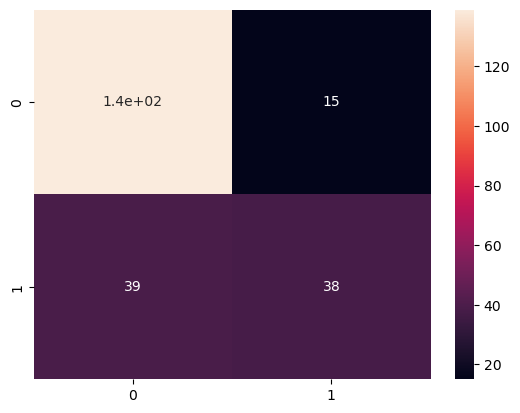

In [9]:
conf_matrix = confusion_matrix(test1["Outcome"], labels)
sns.heatmap(conf_matrix, annot=True)

In [10]:
#Create calc for misclassification rate. 
#We can look this up, but it is just adding up the errors and dividing. 
#The confusion matrix is an array, so we just need to grab the correct cells. 
#The is the compliment to the accuracy score, so we can just use library functions in general
mis_rate = (conf_matrix[[1],[0]].flat[0] + conf_matrix[[0],[1]].flat[0])/len(test1)
print(mis_rate)
print(accuracy_score(test1["Outcome"], labels))


0.23376623376623376
0.7662337662337663


## Classification Accuracy Metrics

Now, the accuracy is ok, but we have a noticable imbalance between false negatives and false positives (exact split we bounce around due to randomness - when I built this the frist run was pretty large, other runs were smaller). We previously looked briefly at all the different accuracy metrics that can be generated from the confusion matrix. In real use, you need to combine some domain knowledge with these results to choose the measures that make sense for what you're doing. 

## 分類準確度指標

現在，準確性還可以，但是我們在假陰性和假陽性之間存在明顯的不平衡（由於隨機性，我們會反彈精確分割 - 當我構建這個時，第一次運行非常大，其他運行較小）。 

我們之前簡要介紹了可以從混淆矩陣生成的所有不同的準確度指標。 在實際使用中，您需要將一些領域知識與這些結果相結合，以選擇對您所做的事情有意義的度量。

<b>Note:</b> this one shows normalized values, aka percentages. 

![Confusion Matrix](images/conf_mat_small.png "Confusion Matrix")

### Precision

Precision is the ratio of the True Positives to all of the True Positives + False Positives. 

Precision is most useful as a metric when we want to avoid false positives - think about if you are predicting terrorists, you don't want to Guantanamo aunt Betty on the way home from her bake sale. 

精度是真陽性與所有真陽性 + 假陽性的比率。

當我們想要避免誤報時，精確度作為一個指標是最有用的——想想如果你在預測恐怖分子，你不想關塔那摩貝蒂阿姨從她的烘焙義賣回家的路上。

### Recall / Sensitivity

Recall is the ratio of the True Positives to the True Positives + False Negatives. 

Recall is most useful as a metric when we really want to identify all of the positives - think about if you are predicting terrorists, you want to get them all. 

當我們真的想確定所有積極因素時，召回率作為一個指標最有用——想想如果你在預測恐怖分子，你想得到所有的。

![Precision - Recall](images/prec_rec.png "Precision - Recall")

### F1 Score

There is one score that is pretty common that may be helpful  - the F1 score. The F1 score seeks to balance PRECISION (avoid false positives) and RECALL (target true positives, at cost of false positives). There's also a way (fbeta) to adjust the balance between recall and precision, but we'll set that aside for now. The f1 score is:

有一個非常常見的分數可能會有所幫助 - F1 分數。 

F1 分數試圖平衡 PRECISION（避免誤報）和 RECALL（以真報為目標，以誤報為代價）。 

還有一種方法 (fbeta) 可以調整召回率和準確率之間的平衡，但我們暫時將其擱置一旁。 f1分數是：

$ F1 = 2 * \frac{(precision * recall)}{(precision + recall)} $

In practice, it is simple with an sklearn function. 

### Which One?

Using a metric other than accuracy will ultimately be defined by the problem being predicted. If there's no outside pressure, the overall accuracy and the F1 will probably be what we normally look at. 

使用準確性以外的指標最終將由所預測的問題來定義。 如果沒有外界壓力，整體精度和F1大概就是我們平時看的樣子。

### Side Note: Other Metrics

Below the F1, I put in log-loss, which is another metric of accuracy. This one is commonly seen later on when doing neural network stuff. The idea is always the same - we want to find something that minimizes the amount of error. In a question on the credit card fraud I said that you may try to optimize for some other metric than raw accuracy - this is an example of one that is common. In short, you'll define a ML algorithm to use, then define a loss function (e.g. log-loss), and the algorithm will repeat trials (gradient descent) in an effort to minimize that "loss". 

Log Loss is the negative average of the log of corrected predicted probabilities for each instance. E.g. if a value is true, and a prediction is .8 probability, the corrected probability is .8; if a value is false and the prediction is .8 probability, the corrected proability is .2. These values are "logged", then the negative average is taken (the logs are negative), and that's the metric for loss - or how bad the predictions are. Less loss, more accuracy. 

在 F1 下方，我輸入了對數損失，這是另一個準確度指標。這個在後面做神經網絡的時候很常見。

這個想法總是一樣的——我們想找到可以最大限度地減少錯誤數量的東西。在一個關於信用卡欺詐的問題中，我說過您可能會嘗試針對原始準確性之外的其他一些指標進行優化——這是一個常見的例子。

簡而言之，您將定義要使用的 ML 算法，然後定義損失函數（例如對數損失），算法將重複試驗（梯度下降）以盡量減少“損失”。

對數損失是每個實例的校正預測概率對數的負平均值。例如。如果一個值為真，並且預測為 0.8 概率，則修正後的概率為 0.8；如果值為假且預測為 0.8 概率，則修正後的概率為 0.2。

這些值被“記錄”，然後取負平均值（對數為負），這就是損失的度量——或者預測有多糟糕。更少的損失，更高的準確性。

In [11]:
#Can also use the accuracy score for sklearn. 
print("Acc%:", accuracy_score(test1["Outcome"], labels))
print("F1:", f1_score(test1["Outcome"], labels))
print("LogLoss:", log_loss(test1["Outcome"], preds1))

Acc%: 0.7662337662337663
F1: 0.5846153846153845
LogLoss: 0.4810660295478089


Ok, roughly 77% accuracy. Put that in our pockets. We are clearly better than the baseline. 

# Feature Scaling

Feature scaling includes several similar methods of taking numerical values and transforming them to be on a different scale. There are several, a few we'll look at right now are:
<ul>
<li>Normalization - rescale the data so all values are between 0 and 1. 
<li>Standardization - rescale the data so there is a mean of 0 and a standard deviation of 1. 
</ul>

These all process our data in a similar way - taking the original data, and shifting its distribution using a transformation. The calculations for these scaling methods are:

特徵縮放包括幾種獲取數值並將其轉換為不同比例的類似方法。 有幾個，我們現在要看的幾個是：
<ul>
<li>歸一化 - 重新縮放數據，使所有值都在 0 和 1 之間。
<li>標準化 - 重新調整數據，使平均值為 0，標準差為 1。
</ul>

這些都以類似的方式處理我們的數據——獲取原始數據，並使用轉換來改變其分佈。 這些縮放方法的計算是：

<ul>
<li>Normalization: x = ( (x-min(x)) / (max(x)-min(x)) ) 
<li>Standardization: x = ( (x-mean(x)) / (std(x)) )
</ul>

![Scaling](images/scaling.png "Scaling")

Note: There are other feature scaling algorithms/methods, these are just the two more common ones. The idea is pretty much always the same. One other consdieration is how the scaling treats outliers, which we'll worry about more next semester. 

![Standardization - Normalization](images/norm_stand.jpeg "Standardization - Normalization")

<h3>OK.... Why?</h3>

Feature scaling has several benefits, the impact of these benefits varies widely depending on the exact original data, and the type of models you're using. The reasons are:
<ul>
<li>Scaling - different values may have widely different scales (e.g. if processing a loan, age and net worth will be very different). Scaling can sometimes cause problems with the relative impact of different ranges distorting calculations. Small values can be "drowned out" by larger values. 
<li>Range - similar to the scale problem, if data values are radically different, some calculations will become less accurate. This particularly can impact distance based calculations, like clustering. 
<li>Speed - with algorithms that use methods like gradient descent (like logistic regression), having values on different scales and ranges may cause the algorithm to take longer to converge on a solution, or potentially prevent it at all. 


特徵縮放有幾個好處，這些好處的影響因確切的原始數據和您使用的模型類型而異。 原因是：
<ul>
<li>比例尺 - 不同的值可能有很大不同的比例尺（例如，如果處理貸款，年齡和淨資產將非常不同）。 

縮放有時會導致不同範圍扭曲計算的相對影響出現問題。 較小的值可能會被較大的值“淹沒”。

<li>範圍 - 類似於比例問題，如果數據值完全不同，一些計算將變得不准確。 這尤其會影響基於距離的計算，例如聚類。
<li>速度 - 對於使用梯度下降（如邏輯回歸）等方法的算法，具有不同尺度和範圍的值可能會導致算法需要更長的時間才能收斂到一個解決方案，或者可能根本無法收斂。
</ul>

Feature scaling can improve predictive accuracy, sometimes dramatically. Scaling data is not super impactful in some calculations (linear regression, trees) and it can (can - not will) be very impactful in others (logistic regression, gradient descent, neural networks, PCA). In general, when we have an algorithm that is adjusting itself to try to find the most accurate solution (e.g. log. reg. with gradient descent), scaling the data helps and is pretty standard. When we get to things like neural networks later on, it is just part of the process. 

We will do this pretty often in machine learning applications, similar to encoding categorical varaibles it is kind of a preparatory step that we just do without thinking much about it because it makes things work (or work better).

特徵縮放可以提高預測準確性，有時甚至可以顯著提高。 

縮放數據在某些計算（線性回歸、樹）中並不是很有影響力，但它可以（不能 - 不會）對其他計算（邏輯回歸、梯度下降、神經網絡、PCA）有很大影響。 

一般來說，當我們有一個算法正在自我調整以嘗試找到最準確的解決方案時（例如 log.reg. 使用梯度下降），縮放數據會有所幫助並且是非常標準的。 

當我們稍後接觸到神經網絡之類的東西時，它只是過程的一部分。

我們將在機器學習應用程序中經常這樣做，類似於對分類變量進行編碼，這是一種準備步驟，我們只是在不考慮太多的情況下就這樣做了，因為它可以使事情正常進行（或工作得更好）。

<h3>Which Scaler to Pick?</h3>

There is not generally a definitive answer to that, and the real answer is to try a few and observe the results in accuracy. We do have a few rules of thumb:
<ul>
<li>Normalization: distribution is unkonwn, things need to be 0 to 1. 
<li>Standardization: distributions are normal(ish). 
</ul>

For now deciding between the methods isn't a huge concern. If the features look normal, we'll try to standardize; if not, normalize. We can worry about some finer differences as they come up next semester. If in doubt, try each, check accuracy, choose the best. Outliers will impact each (think about why), so we probably want to deal with those prior to scaling. 

通常沒有明確的答案，真正的答案是嘗試一些並觀察結果的準確性。 我們確實有一些經驗法則：
<ul>
<li>歸一化：分佈未知，事物需要從 0 到 1。
<li>標準化：分佈是正常的（大概）。
</ul>

目前，在這些方法之間做出決定並不是一個大問題。 如果特徵看起來正常，我們會嘗試標準化； 如果不是，則正常化。 

我們可以擔心下學期出現的一些更細微的差異。 如果有疑問，請嘗試每一個，檢查準確性，選擇最好的。 離群值會影響每個（想想為什麼），所以我們可能想在擴展之前處理這些問題。

For fun, we can build a function for each, since they are simple. 

In [12]:
def dumbNormalizer(x):
    x_ = (x - np.min(x)) / (np.max(x) - np.min(x))
    return x_

In [13]:
#Some example data
#d1 = [1,2,3,4,5,9,5,12,7,8,12,5,6,8,2,8,9]
#d2 = [1,2,3,4,5,9,5,12,7,12,5,6,8,2,8,9,800]
d1 = df["BMI"].to_list()
d2 = df["Glucose"].to_list()

In [14]:
#Normalize some data
tmp = dumbNormalizer(d1)
print(np.mean(tmp))
print(tmp[0:5])

0.4767895398658719
[0.50074516 0.39642325 0.34724292 0.41877794 0.64232489]


And now a dumb standardizer...

In [15]:
def dumbStandardizer(x):
    x_ = (x - np.mean(x)) / (np.std(x))
    return x_

In [16]:
#Standardize some data
tmp = dumbStandardizer(d1)
print(np.mean(tmp))
print(tmp[0:5])

2.590520390792032e-16
[ 0.20401277 -0.68442195 -1.10325546 -0.49404308  1.4097456 ]


### How Does the Distribution Change?

We can visualize both datasets in their original form, after normalization, and after standardization. The general pattern of the data isn't changed, but the range that it is distributed over is different. 

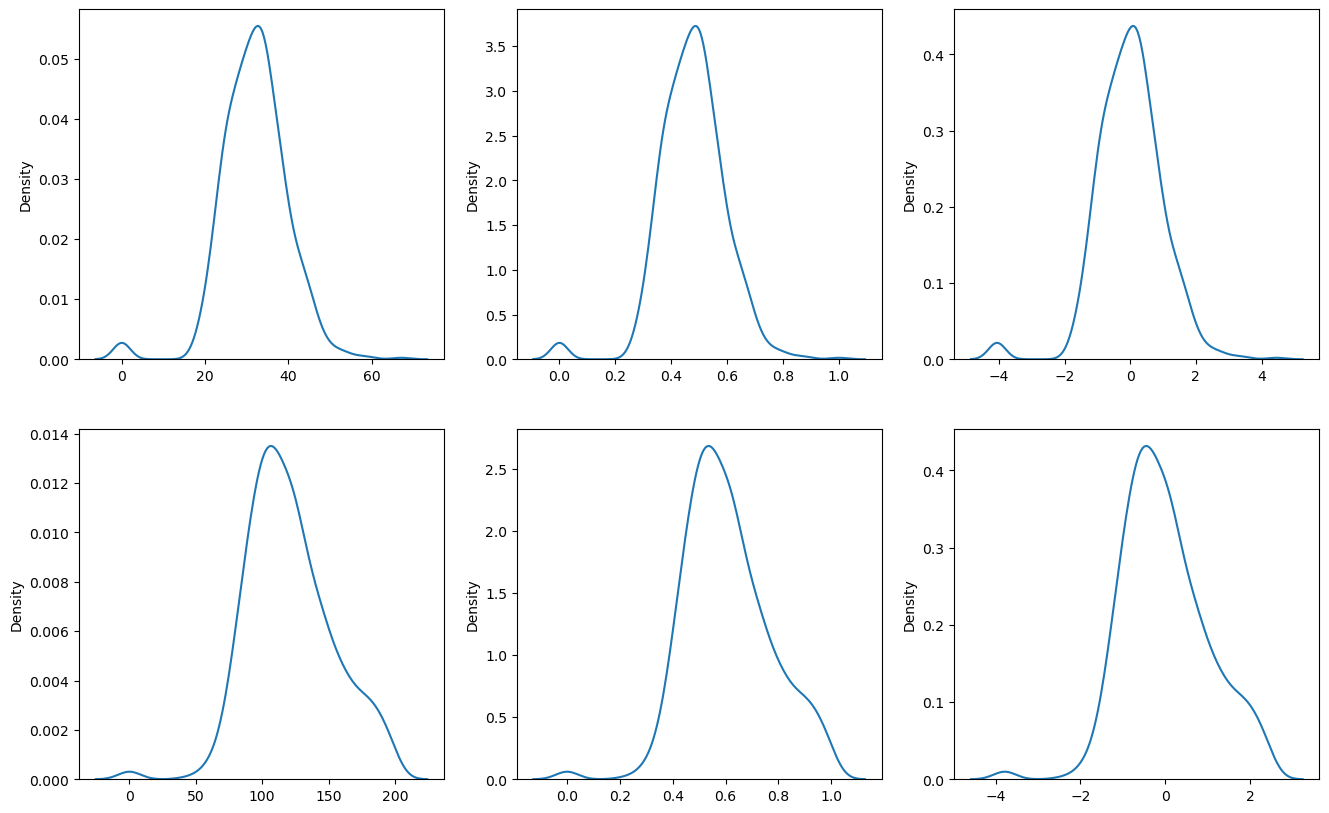

In [17]:
#Visualize all
thinkplot.PrePlot(6,2,3)
sns.kdeplot(d1)
thinkplot.SubPlot(2)
sns.kdeplot(dumbNormalizer(d1))
thinkplot.SubPlot(3)
sns.kdeplot(dumbStandardizer(d1))
thinkplot.SubPlot(4)
sns.kdeplot(d2)
thinkplot.SubPlot(5)
sns.kdeplot(dumbNormalizer(d2))
thinkplot.SubPlot(6)
sns.kdeplot(dumbStandardizer(d2))
thinkplot.Config()

### Scaling Outcomes

For each of the scaling, the distribution is the same for the data after the transformation, but the ranges are different. We can also see visually the impact of outliers here - we'd normally want to address those in advance. In extreme cases, having a massive outlier can "squish" all the data at one end of the distribution, which will be bad in most cases. 

#### Scaling Caveat

One detail we've overlooked here is that the data should technically be scaler after the split of train/test data, and the scaler should only be trained on the training data (fit) and applied on the testing data (transform). This is to prevent any data leakage - the test data is supposed to be brand new, and if it is able to influence the scaling, then it has some impact on the training of the model. How much of an impact does this make? Probabaly not much for the vast majority of applications, but it is technically correct to keep 'em separated. 

We'll do the below example with it scaled 'properly'. 

<h3>Library Scaling Functions</h3>

Luckily, we don't really need to bust out our algebra to build any of these calculations by hand, we can use some built in functions in scikit learn to do it for us. These functions can also be built into a pipeline to process data (next semester), so we can build this transformation in without really seeing the resutlts. Like encoding last week, this takes data that is readable, and makes it not readable - we can package all of those steps in with our modelling, so legible data goes in - a trained model comes out. 

In scikit learn, the different functions for these methods are (examples below in code):
<ul>
<li>Normalization: MinMaxScaler
<li>Standardization: StandardScaler
</ul>

<h3>庫縮放函數</h3>

幸運的是，我們真的不需要用代數來手動構建任何這些計算，我們可以使用 scikit learn 中的一些內置函數來為我們做這件事。 

這些功能也可以構建到管道中以處理數據（下學期），因此我們可以在不真正看到結果的情況下構建此轉換。 

就像上週的編碼一樣，這需要可讀的數據，並使其不可讀——我們可以將所有這些步驟打包到我們的建模中，這樣清晰的數據就會進入——一個訓練有素的模型就會出來。

在 scikit learn 中，這些方法的不同功能是（下面的代碼示例）：
<ul>
<li>歸一化：MinMaxScaler
<li>標準化：StandardScaler

<h3>Example with Real Functions</h3>

Building scaling functions is pretty easy, in practice though we can use the sklearn ones, lets build that into the logistic regression for the diabetes prediction. 

In [18]:
#Make arrays from data
dfY = df["Outcome"]
dfX = df.drop(columns={"Outcome"}) #There isn't generally a need to standardize the Y values

x = np.array(dfX)
y = np.array(dfY).reshape(-1,1)
x.shape, y.shape

((768, 8), (768, 1))

In [19]:
#Split Data
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.33)

In [20]:
#Create scaler and choose method. 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Comment one out, use the other
#scaler = StandardScaler()
scaler = MinMaxScaler()

In [21]:
#Standardize or normalize
#Use training data to fit the scaler, then apply that predefined scale to the test data
x2 = scaler.fit_transform(X_train2)
X_trans2 = scaler.transform(X_test2)

We have standardized and normalized data, do linear regression stuff...

I'm going to set it up so we can swap the x data in the first line of code below, mostly to save typing. We can run everything twice, once for each scaling technique. 

In [22]:
#Train model
model2 = LogisticRegression().fit(x2,y_train2.ravel())

#Make predictions
preds2 = model2.predict(X_trans2)

F1: 0.5974025974025974
Acc: 0.7559055118110236


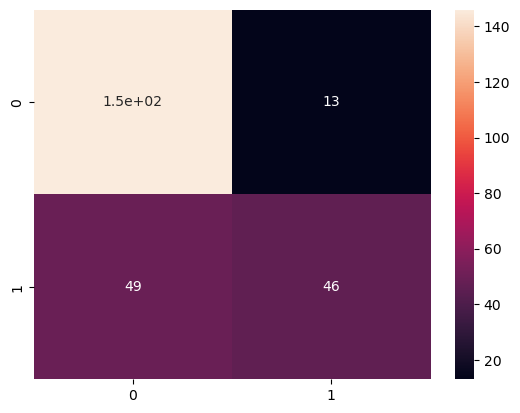

In [23]:
#Generate 1/0 results and show results
labels2 = convert_prob_to_label(np.array(preds2))
conf_matrix2 = confusion_matrix(y_test2,labels2)
sns.heatmap(conf_matrix2, annot=True)

print("F1:",f1_score(y_test2, labels2))
print("Acc:",accuracy_score(y_test2, labels2))

Yay. We are super happy. 

IIRC, the accuracy without doing any scaling was similar (~76%), that's ok. This data didn't really have any massively differing ranges for the original data. We also didn't do any outlier filtering - what if we try that and repeat? We know from doing the dumb scaling, that there are a few outliers. 

There's a simple filter commented out up above, we'll go remove and repeat. It might make it better, it might not. This case only has a few outliers and they are not outrageous, so we shouldn't be surprised if the difference is relatively small. We can see that the errors are more balanced, so the F1 score does show improvement. 

IIRC，沒有做任何縮放的準確度是相似的（~76%），沒關係。 該數據與原始數據並沒有真正的大範圍差異。 

我們也沒有進行任何異常值過濾——如果我們嘗試並重複該操作會怎樣？ 我們從做 dumb scaling 中知道，有一些異常值。

上面註釋掉了一個簡單的過濾器，我們將刪除並重複。 它可能會使它變得更好，也可能不會。 

這個案例只有幾個異常值，它們並不離譜，所以如果差異相對較小，我們不應該感到驚訝。 我們可以看到錯誤更加均衡，因此 F1 分數確實有所改善。

#### With a Pipeline

We can use our pipeline to string the steps in our data prep together. In general, most of the sklearn functions that we may need can fit into these pipelines. Once the pipeline is made, it "is" our model - it will do whatever preparation steps we build into the list of actions. Here, we can use it to string together the scaling and the model; in other models we might add a step to deal with missing data (impute), perform encoding (like the one-hot get_dummies), or any number of steps. This allows us to build what is effectively a new model that contains both all of the data preparation and the modeling, all in one package. This is not required, but tends to make things more manageable. 


#### 使用管道

我們可以使用我們的管道將數據準備中的步驟串在一起。 

通常，我們可能需要的大多數 sklearn 函數都可以適合這些管道。 

一旦創建了管道，它就“是”我們的模型——它將執行我們構建到操作列表中的任何準備步驟。 

在這裡，我們可以用它把縮放和模型串起來； 在其他模型中，我們可能會添加一個步驟來處理缺失數據（估算）、執行編碼（如 one-hot get_dummies）或任意數量的步驟。 

這使我們能夠有效地構建一個包含所有數據準備和建模的新模型，所有這些都在一個包中。 這不是必需的，但往往會使事情更易於管理。

F1: 0.5974025974025974
Acc: 0.7559055118110236


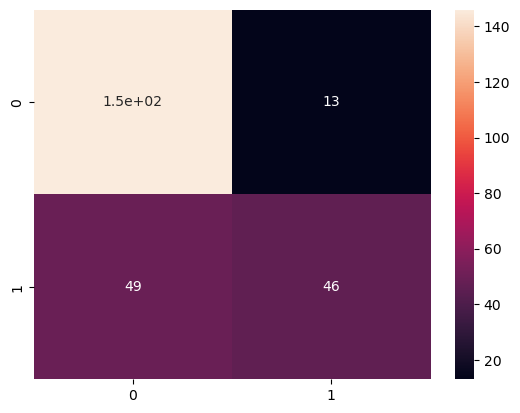

In [24]:
# Make pipeline
m2 = make_pipeline( MinMaxScaler(),
                    LogisticRegression()
                    )

# Use pipeline like it is a model. 
m2.fit(X_train2, y_train2.ravel())
m2_pred = m2.predict(X_test2)

m2_label = convert_prob_to_label(np.array(m2_pred))
m2_matrix = confusion_matrix(y_test2,m2_label)
sns.heatmap(m2_matrix, annot=True)

print("F1:",f1_score(y_test2, m2_label))
print("Acc:",accuracy_score(y_test2, m2_label))

## And With StatsModels - Variable Importance

We can also look at the variable importance, and compare any changes. 

In [25]:
train2_sm, test2_sm = train_test_split(df,test_size=0.3)

#Define formula
form = "Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age"
model2_sm = sm.logit(data=train2_sm, formula=form).fit()

#Make predictions for later, get summary for now
preds2_sm = model2_sm.predict(test2_sm)
model2_sm.summary()

Optimization terminated successfully.
         Current function value: 0.466317
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      528
Method:                           MLE   Df Model:                            8
Date:                Wed, 30 Nov 2022   Pseudo R-squ.:                  0.2836
Time:                        13:26:14   Log-Likelihood:                -250.41
converged:                       True   LL-Null:                       -349.53
Covariance Type:            nonrobust   LLR p-value:                 1.505e-38
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.7754      0.858    -10.225      0.000     -10.458      -7.093
Pregnancies                  0.1347      0.039      3.455      0.001       0.058       0.211
Glucose                      0.0357      0.004      7.988      0.000       0.027       0.044
BloodPressure               -0.0094      0.007     -1.403      0.161      -0.023       0.004
SkinThickness               -0.0052      0.008     -0.627      0.531      -0.021       0.011
Insulin                     -0.0012      0.001     -1.041      0.298      -0.003       0.001
BMI                          0.0889      0.017      5.085      0.000       0.055       0.123
DiabetesPedigreeFunction     0.9730      0.374      2.603      0.009       0.240       1.706
Age                          0.0208      0.012      1.762      0.078      -0.002       0.044
============================================================================================
"""

Compared to the original...

In [26]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      528
Method:                           MLE   Df Model:                            8
Date:                Wed, 30 Nov 2022   Pseudo R-squ.:                  0.2800
Time:                        13:26:14   Log-Likelihood:                -251.67
converged:                       True   LL-Null:                       -349.53
Covariance Type:            nonrobust   LLR p-value:                 5.087e-38
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.4054      0.856     -9.820      0.000     -10.083      -6.728
Pregnancies                  0.1451      0.039      3.703      0.000       0.068       0.222
Glucose                      0.0356      0.004      8.105      0.000       0.027       0.044
BloodPressure               -0.0146      0.006     -2.362      0.018      -0.027      -0.002
SkinThickness                0.0080      0.009      0.934      0.350      -0.009       0.025
Insulin                     -0.0016      0.001     -1.451      0.147      -0.004       0.001
BMI                          0.0859      0.018      4.775      0.000       0.051       0.121
DiabetesPedigreeFunction     1.1123      0.356      3.127      0.002       0.415       1.810
Age                          0.0105      0.011      0.937      0.349      -0.011       0.033
============================================================================================
"""

#### Results

The degree of changes here can vary quite a bit, we generally expect more of an impact the more different the ranges are of the varaibles. For example, if you had some model predicting space stuff for a telescope, and some features (like distances) are massive (like hundreds of millions of km), and other features are tiny (like fractions of degrees for angles), that difference would probably cause the model with non-normalized data to be far worse. 

![Space](images/space.png "Space")

As with most things, this will impact different models differently. For things that are tree based normalization (normally) makes no difference, for reasons that will see when we look at how trees function. 

#### Run With Outliers Removed

We can also get rid of some outliers and scale the data and see what we get. 

In [27]:
#Kill outliers. 

df_o = df[df["Glucose"] > 20]
df_o = df_o[df_o["BloodPressure"] > 20]
df_o = df_o[df_o["SkinThickness"] < 80]
df_o = df_o[df_o["Glucose"] > 20]
df_o = df_o[df_o["BMI"] > 10]
#df_o.head()

#Split and Scale
train2_o, test2_o = train_test_split(df_o,test_size=0.3)
scaler_o = MinMaxScaler()
x_o = scaler_o.fit_transform(train2_o)
x_test_o = scaler_o.transform(test2_o)

#Make df, so the variable names stay
x_o = pd.DataFrame(x_o, columns = df.columns)
x_test_o = pd.DataFrame(x_test_o, columns=df.columns)
#x_o.head()

#Define formula
form = "Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age"
model_o = sm.logit(data=x_o, formula=form).fit()

#Make predictions for later, get summary for now
preds_o = model_o.predict(x_test_o)
model_o.summary()


Optimization terminated successfully.
         Current function value: 0.457897
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  506
Model:                          Logit   Df Residuals:                      497
Method:                           MLE   Df Model:                            8
Date:                Wed, 30 Nov 2022   Pseudo R-squ.:                  0.2827
Time:                        13:26:14   Log-Likelihood:                -231.70
converged:                       True   LL-Null:                       -322.99
Covariance Type:            nonrobust   LLR p-value:                 2.938e-35
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -5.1343      0.626     -8.208      0.000      -6.360      -3.908
Pregnancies                  1.6573      0.683      2.426      0.015       0.319       2.996
Glucose                      5.1166      0.662      7.726      0.000       3.819       6.414
BloodPressure               -1.2952      1.085     -1.193      0.233      -3.423       0.832
SkinThickness                0.2009      0.553      0.364      0.716      -0.882       1.284
Insulin                     -0.8448      0.910     -0.928      0.353      -2.628       0.939
BMI                          5.0389      1.037      4.858      0.000       3.006       7.072
DiabetesPedigreeFunction     1.7449      0.869      2.007      0.045       0.041       3.449
Age                          1.6844      0.716      2.352      0.019       0.281       3.088
============================================================================================
"""

F1: 0.5833333333333334
Acc: 0.7235023041474654


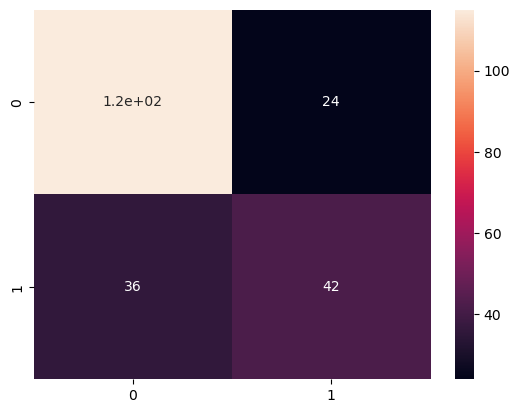

In [28]:
label_o = convert_prob_to_label(np.array(preds_o))
matrix_o = confusion_matrix(test2_o["Outcome"],label_o)
sns.heatmap(matrix_o, annot=True)

print("F1:",f1_score(test2_o["Outcome"],label_o))
print("Acc:",accuracy_score(test2_o["Outcome"],label_o))

##### If We Try Removing Some Variables

We can drop a few bad p-value features and see what we get. Remember, we don't really expect accuracy to jump, but we suspect that the accuracy won't drop that much. 

In [29]:
#Define formula
form1 = "Outcome ~ Pregnancies + Glucose + Insulin + BMI + DiabetesPedigreeFunction"
model_o2 = sm.logit(data=x_o, formula=form1).fit()

#Make predictions for later, get summary for now
preds_o2 = model_o2.predict(x_test_o)
model_o2.summary()

Optimization terminated successfully.
         Current function value: 0.463895
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  506
Model:                          Logit   Df Residuals:                      500
Method:                           MLE   Df Model:                            5
Date:                Wed, 30 Nov 2022   Pseudo R-squ.:                  0.2733
Time:                        13:26:14   Log-Likelihood:                -234.73
converged:                       True   LL-Null:                       -322.99
Covariance Type:            nonrobust   LLR p-value:                 2.957e-36
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -5.4864      0.498    -11.018      0.000      -6.462      -4.510
Pregnancies                  2.3984      0.577      4.158      0.000       1.268       3.529
Glucose                      5.2292      0.623      8.391      0.000       4.008       6.451
Insulin                     -0.7309      0.811     -0.901      0.367      -2.320       0.858
BMI                          4.7221      0.936      5.042      0.000       2.887       6.558
DiabetesPedigreeFunction     1.8670      0.858      2.176      0.030       0.185       3.549
============================================================================================
"""

F1: 0.6206896551724138
Acc: 0.7465437788018433


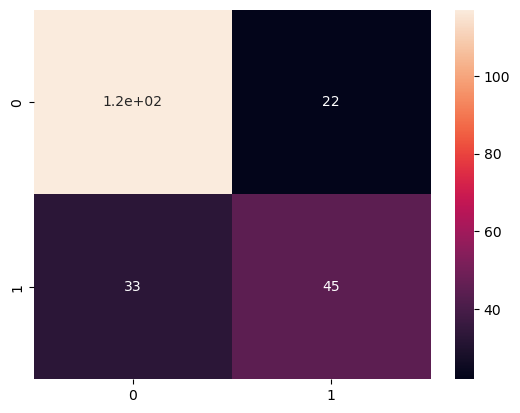

In [30]:
label_o2 = convert_prob_to_label(np.array(preds_o2))
matrix_o2 = confusion_matrix(test2_o["Outcome"],label_o2)
sns.heatmap(matrix_o2, annot=True)

print("F1:",f1_score(test2_o["Outcome"],label_o2))
print("Acc:",accuracy_score(test2_o["Outcome"],label_o2))

<H1>Logistic Regression with Normalization Exercise</H1>

Logistic regression with normalization. 

Identify penguin sex. In doing so:
<ul>
<li>Explore the data. 
<li>Clean any erroneous data. 
<li>Create classification model. 


In [31]:
df2 = sns.load_dataset("penguins")
df2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Check data types. 

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Check for missing. 

In [33]:
df2.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [34]:
df2 = df2.dropna()
df2.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

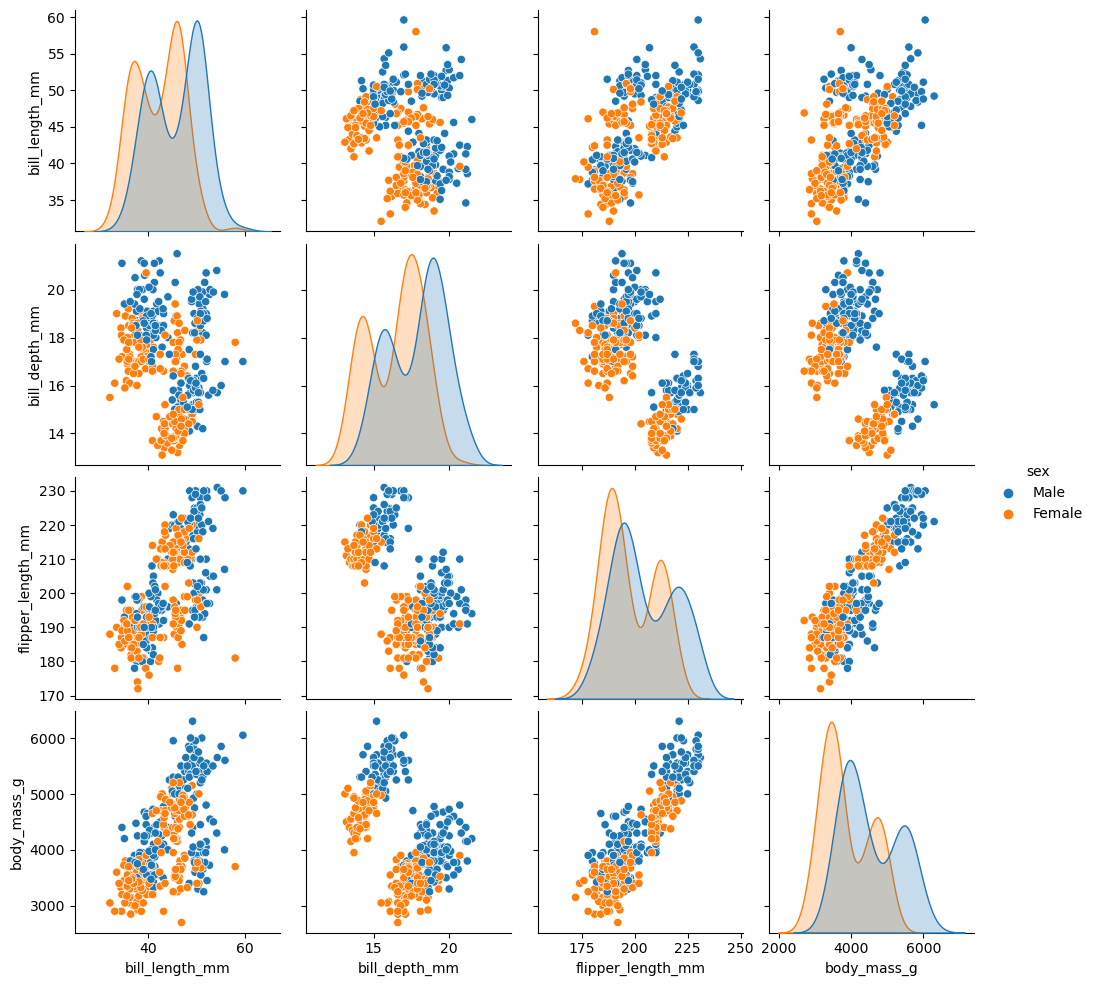

In [35]:
#Numerical value exploration
sns.pairplot(df2, hue="sex")

Numerical things look pretty OK. What about categorical?

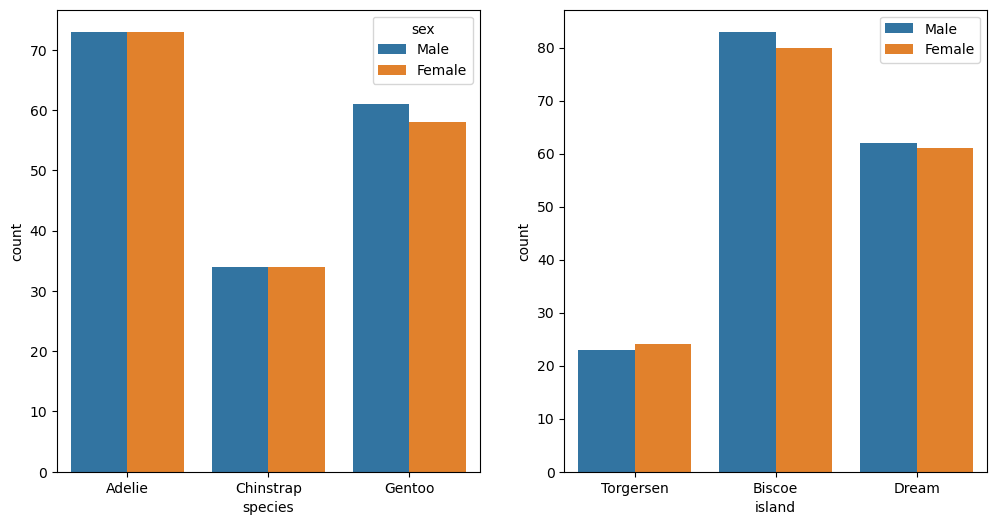

In [36]:
thinkplot.PrePlot(2,1,2)
sns.countplot(data=df2, x="species", hue="sex")
thinkplot.SubPlot(2)
sns.countplot(data=df2, x="island", hue="sex")
thinkplot.Config()

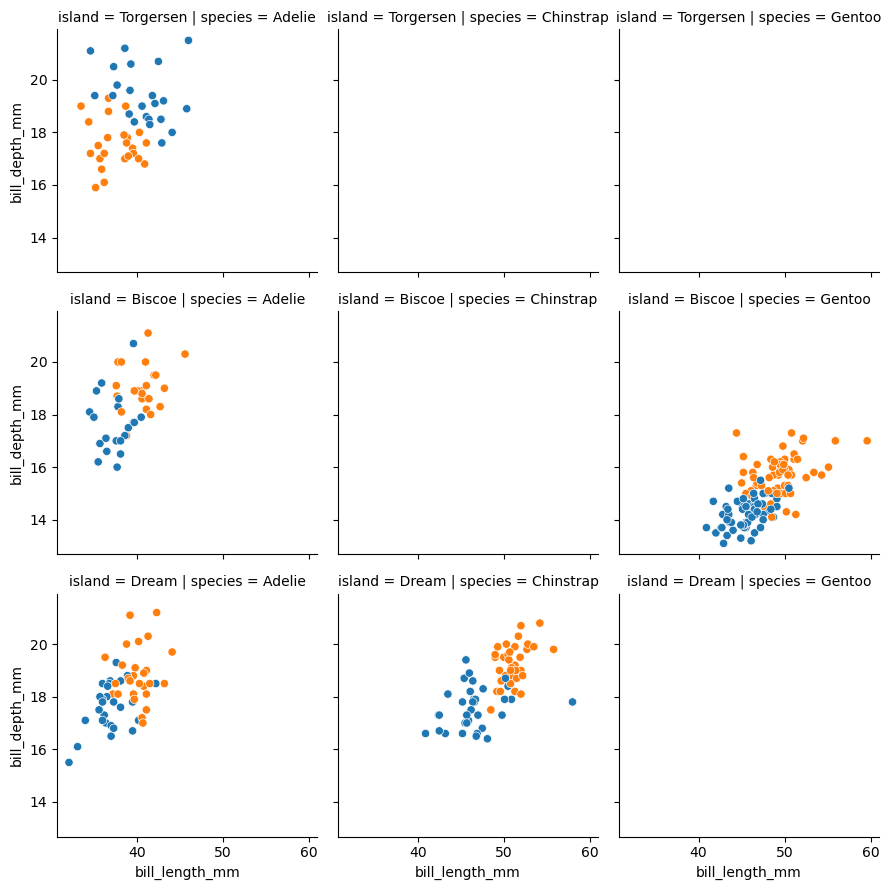

In [37]:
#Facetgrid allows us to explore and split data easily. 
#Could play with this for differnet views. https://seaborn.pydata.org/generated/seaborn.FacetGrid.html 
#Col and row in the first line are our categoricals.
#Second line is the type of chart, and its relevent details. 
g = sns.FacetGrid(df2, col="species", row="island")
g.map_dataframe(sns.scatterplot, x="bill_length_mm", y="bill_depth_mm", hue="sex")

Nothing looks too odd in the exploration (this is a toy dataset, so that's normal). We can do some modelling and predict sex...

I will sklearn, because I like it more. Statsmodels imight be useful in a bit, we could throw it in to get p values for the variables. 

In [38]:
#Encode the categorical varaiables. 
df2_ = pd.get_dummies(df2, drop_first=True)
df2_.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,39.1,18.7,181.0,3750.0,0,0,0,1,1
1,39.5,17.4,186.0,3800.0,0,0,0,1,0
2,40.3,18.0,195.0,3250.0,0,0,0,1,0
4,36.7,19.3,193.0,3450.0,0,0,0,1,0
5,39.3,20.6,190.0,3650.0,0,0,0,1,1


In [39]:
df2_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     333 non-null    float64
 1   bill_depth_mm      333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
 4   species_Chinstrap  333 non-null    uint8  
 5   species_Gentoo     333 non-null    uint8  
 6   island_Dream       333 non-null    uint8  
 7   island_Torgersen   333 non-null    uint8  
 8   sex_Male           333 non-null    uint8  
dtypes: float64(4), uint8(5)
memory usage: 14.6 KB


In [40]:
#Make arrays from data
dfYP = df2_["sex_Male"]
dfXP = df2_.drop(columns={"sex_Male"}) #There isn't generally a need to standardize the Y values

xP = np.array(dfXP)
yP = np.array(dfYP).reshape(-1,1)
xP.shape, yP.shape

((333, 8), (333, 1))

In [41]:
#Split Data
X_trainP, X_testP, y_trainP, y_testP = train_test_split(xP, yP, test_size=0.33)

In [42]:
#Scale data
scalerP = MinMaxScaler()

#Use training data to fit the scaler, then apply that predefined scale to the test data
x2P = scalerP.fit_transform(X_trainP)
X_transP = scalerP.transform(X_testP)

In [43]:
#Model 
modelP = LogisticRegression().fit(x2P,y_trainP.ravel())

In [44]:
#Compare to baseline
df2["sex"].value_counts()

Male      168
Female    165
Name: sex, dtype: int64

Baseline is roughly 50/50, how'd we do? 

F1: 0.8928571428571428
Acc: 0.8909090909090909


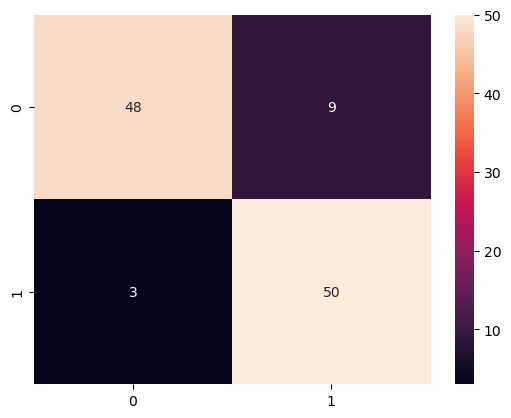

In [45]:
#Make predictions and examine accuracy
predsP = modelP.predict(X_transP)

labelsP = convert_prob_to_label(np.array(predsP))
conf_matrixP = confusion_matrix(y_testP,labelsP)
sns.heatmap(conf_matrixP, annot=True)

print("F1:",f1_score(y_testP, labelsP))
print("Acc:",accuracy_score(y_testP, labelsP))

We're doing pretty well. What could be better? 

One suspicion I have would be that the species are somewhat different. Gentoo in particular seems to have different metrics, so maybe we'd predict it separately? I might need more data for that. 

Also, can we improve by removing confounding vars? Look at StatsModels to have an idea of variable relevance. 

In [46]:
#Encode all data
dfP_ = pd.get_dummies(data=df2, drop_first=True)

In [47]:
#I'm not going to split data, all I want is variable importance, I'm not evaluating accuracy here. 
formP = "sex_Male ~ bill_length_mm + bill_depth_mm + flipper_length_mm + body_mass_g + species_Chinstrap + species_Gentoo + island_Dream + island_Torgersen"
modelP_SM = sm.logit(data=dfP_, formula=formP).fit()
modelP_SM.summary()

Optimization terminated successfully.
         Current function value: 0.189260
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               sex_Male   No. Observations:                  333
Model:                          Logit   Df Residuals:                      324
Method:                           MLE   Df Model:                            8
Date:                Wed, 30 Nov 2022   Pseudo R-squ.:                  0.7269
Time:                        13:26:20   Log-Likelihood:                -63.024
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 1.090e-67
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -80.3767     12.330     -6.519      0.000    -104.544     -56.210
bill_length_mm        0.6144      0.132      4.656      0.000       0.356       0.873
bill_depth_mm         1.6464      0.336      4.903      0.000       0.988       2.305
flipper_length_mm     0.0267      0.048      0.552      0.581      -0.068       0.121
body_mass_g           0.0058      0.001      5.351      0.000       0.004       0.008
species_Chinstrap    -7.4027      1.663     -4.452      0.000     -10.661      -4.144
species_Gentoo       -8.4276      2.597     -3.245      0.001     -13.518      -3.337
island_Dream          0.3242      0.809      0.401      0.689      -1.262       1.910
island_Torgersen     -0.5079      0.856     -0.593      0.553      -2.185       1.169
=====================================================================================
"""

I'll remove island and flipper length, try again, and see what's up...

In [48]:
#Drop the things that look least useful. 
dfXP2 = df2_.drop(columns={"sex_Male", "flipper_length_mm", "island_Dream", "island_Torgersen"}) 

#Make arrays from new data, check shapes
xP2 = np.array(dfXP2)
xP2.shape, yP.shape

((333, 5), (333, 1))

In [49]:
#Split Data
X_trainP2, X_testP2, y_trainP2, y_testP2 = train_test_split(xP2, yP, test_size=0.33)

In [50]:
#Scale data
scalerP2 = MinMaxScaler()

#Use training data to fit the scaler, then apply that predefined scale to the test data
x2P2 = scalerP2.fit_transform(X_trainP2)
X_transP2 = scalerP2.transform(X_testP2)

In [51]:
#Model 
modelP2 = LogisticRegression().fit(x2P2,y_trainP2.ravel())

F1: 0.918918918918919
Acc: 0.9181818181818182


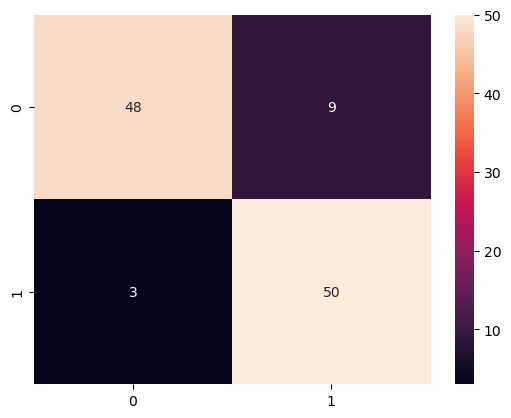

In [52]:
#Make predictions and examine accuracy
predsP2 = modelP2.predict(X_transP2)

labelsP2 = convert_prob_to_label(np.array(predsP2))
conf_matrixP2 = confusion_matrix(y_testP2,labelsP2)
sns.heatmap(conf_matrixP, annot=True)

print("F1:",f1_score(y_testP2, labelsP2))
print("Acc:",accuracy_score(y_testP2, labelsP2))

Looks good!

Note: We have relatively little data, so the swings for accuracy between trials can be pretty pronounced. The first time I ran this there was a big improvement in accuracy after removing stuff, other runs had a smaller difference. More data would make it more stable, repeating the trials would also. You could build a loop to repeat trials, we'll do it the sklearn way early next semester. 